<a href="https://colab.research.google.com/github/akshay2077/AND-Intern-Project-Solutions/blob/main/Major_Project_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings( action = 'ignore')

In [ ]:
data = pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform the columns into numeric
data['Sex'] = le.fit_transform(data['Sex'])
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1
917,38,1,2,138,175,0,1,173,0,0.0,2,0


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [ ]:
# checking missing values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
data['HeartDisease'].value_counts()/len(data)

HeartDisease
1    0.553377
0    0.446623
Name: count, dtype: float64

In [ ]:
X = data.drop( columns = ['HeartDisease'])
Y = data['HeartDisease']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = tts(X, Y, test_size = 0.80, stratify = Y, random_state = 2)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((183, 11), (735, 11), (183,), (735,))

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight = 'balanced')

In [ ]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)              # Predicting class
predicted_probabilities = classifier.predict_proba(x_test) # Predicting probabilities

In [ ]:
predicted_values

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
predicted_probabilities, predicted_probabilities.shape

(array([[0.80745268, 0.19254732],
        [0.96793115, 0.03206885],
        [0.7584474 , 0.2415526 ],
        ...,
        [0.69440505, 0.30559495],
        [0.24306295, 0.75693705],
        [0.94045601, 0.05954399]]),
 (735, 2))

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, predicted_values)
cf

array([[281,  47],
       [ 61, 346]])

In [ ]:
# Accuracy
classifier.score(x_test, y_test)

0.8530612244897959

In [ ]:
#calculating the precision score
from sklearn.metrics import precision_score
Precision = precision_score(y_test, predicted_values)
Precision

0.8804071246819338

In [ ]:
#calculating recall score
from sklearn.metrics import recall_score
Recall = recall_score(y_test, predicted_values)
Recall

0.8501228501228502

In [ ]:
#calculating the f1-score
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
F1

0.8650000000000001

In [ ]:
# calculating precision, recall, f1-score and support at once.
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
precision, recall, f1, support = PRF_summary(y_test, predicted_values)

In [ ]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       328
           1       0.88      0.85      0.87       407

    accuracy                           0.85       735
   macro avg       0.85      0.85      0.85       735
weighted avg       0.85      0.85      0.85       735



In [ ]:
# gathering Precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test, predicted_probabilities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((736,), (736,), (735,))

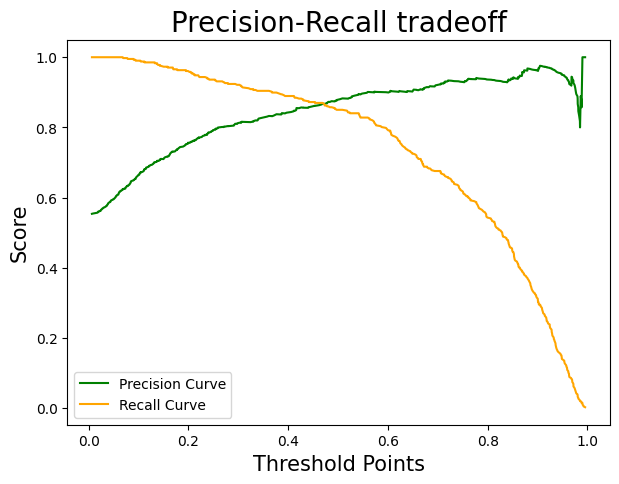

In [ ]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( threshold_points, precision_points[:-1], color = 'green', label = 'Precision Curve')
plt.plot( threshold_points, recall_points[:-1], color = 'orange', label = 'Recall Curve')
plt.xlabel('Threshold Points', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

In [ ]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

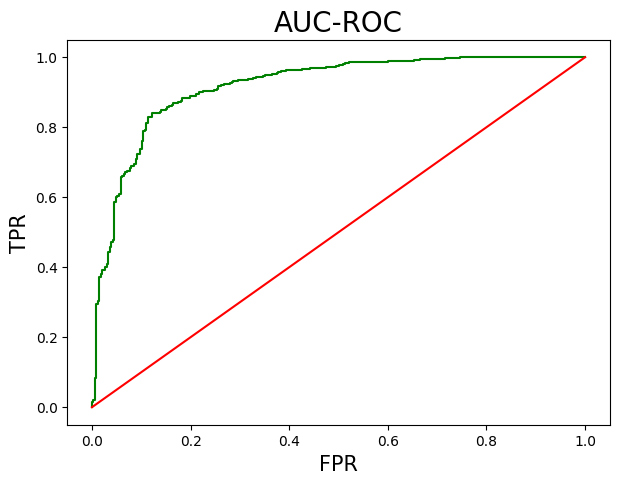

0.9164993707676634

In [ ]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

In [ ]:
# arranging the data
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()

,coefficients,variable
10,-1.403389,ST_Slope
2,-0.603646,ChestPainType
6,-0.336174,RestingECG
4,-0.004849,Cholesterol
7,-0.002288,MaxHR


Text(0.5, 1.0, 'Coefficient plot')

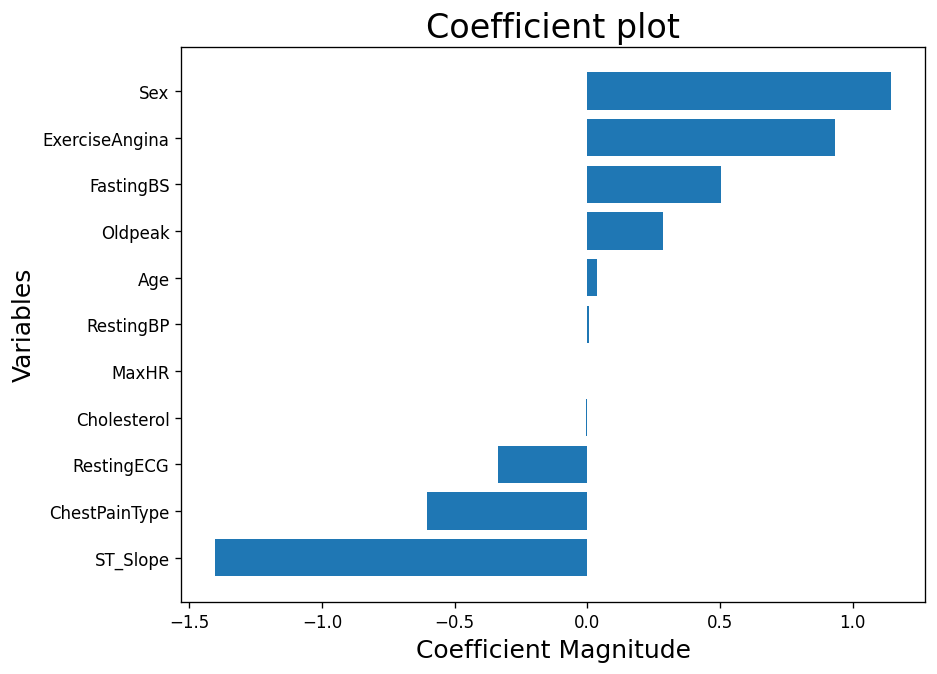

In [ ]:
plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 15)
plt.ylabel('Variables', fontsize = 15)
plt.title('Coefficient plot', fontsize = 20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier = RFC()

In [ ]:
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
classifier = RFC()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):

  model.fit(x1,y1)

  predict = model.predict(x1)
  f1 = f1_score(y1, predict)

  predict = model.predict(x2)
  f2 = f1_score(y2, predict)

  return f1, f2

In [ ]:
def effect(train_score, test_score, x_axis, title):
  plt.figure(figsize = (7,4), dpi = 120)
  plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
  plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
  plt.title(title)
  plt.legend()
  plt.xlabel("parameter_value")
  plt.ylabel("f1 score")
  plt.show()

In [ ]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:
  model = RFC(class_weight = 'balanced_subsample',
              n_estimators = i,
              n_jobs = -1,
              max_depth = 7,
              random_state = 101)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

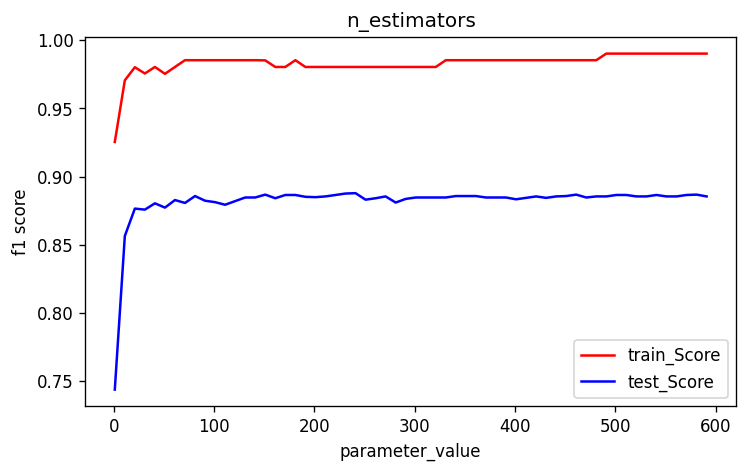

In [ ]:
effect( train, test, range(1,600,10) , 'n_estimators')

In [ ]:
maxfeatures = range(1,X.shape[1])
train = []
test = []

for i in maxfeatures:
  model = RFC(class_weight = 'balanced_subsample', n_estimators = 50,
              n_jobs = -1, max_depth = 7, random_state = 101, max_features = i)
  f1, f2 = calc_score(model, x_train, y_train, x_test, y_test)
  train.append(f1)
  test.append(f2)

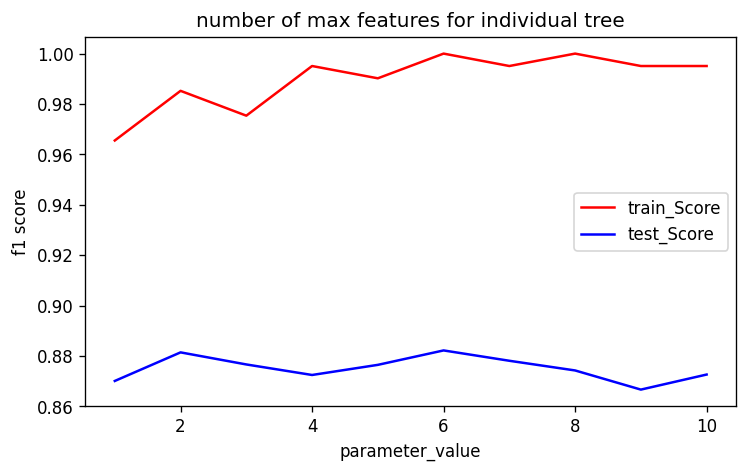

In [ ]:
effect( train, test, maxfeatures , 'number of max features for individual tree')

Building Prdedictive Model

In [ ]:
input_data = (37,1,1,130,283,0,2,98,0,0.0,2)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
    print('The Person does not have a Heart Disease')

else:
    print('The Person is suffering from Heart Disease')



[0]
The Person does not have a Heart Disease
